In [1]:
import os
import json

In [5]:
list_a = {}
len(list_a.keys()) 

0

In [2]:
def encode_labels(labels, suffix_func):
    unique_labels = sorted(set(labels))
    return ' '.join(
        [label.replace(" ", "") + suffix_func(label)
        for label in unique_labels]
    )
    
def textual_encoding_object_classes(labels):
    return encode_labels(labels, lambda label: str(labels.count(label)))

In [49]:
textual_encoding_object_classes(['dog', 'dog', 'cat'])

'cat1 dog2'

In [50]:
labels = ['dog', 'dog', 'cat', 'elephant', 'cat']
unique_labels = ['dog', 'cat']
object_classes = []
for unique_label in unique_labels:
    count = labels.count(unique_label)
    object_classes.extend([(unique_label + str(i)).replace(" ", "") for i in range(1, count + 1)])
object_classes

['dog1', 'dog2', 'cat1', 'cat2']

---

In [11]:
video_part = 'L15'
video_part_dir = f'D:/VNM-Multimodal-Video-Search/dataset/distillation/{video_part}'
video_ids_path = [video_part_dir + '/' + video_id for video_id in os.listdir(video_part_dir)]

In [5]:
def read_json_file(json_file_path):
    with open(json_file_path, 'r') as f:
        image_paths = json.load(f)
    return image_paths

def write_json_file(content_list, save_json_file_path):
    with open(save_json_file_path, 'w') as file:
        json.dump(content_list, file, ensure_ascii=False, indent=4)

In [14]:
for video_id_path in video_ids_path:
    new_list_path = []
    list_path = read_json_file(video_id_path)
    for path in list_path:
        new_path = path.replace('/kaggle/input/l15-aic', './keyframe')
        new_list_path.append(new_path)
    save_dir = video_id_path.replace(f'{video_part}', f'{video_part}_extra')
    os.makedirs(f'D:/VNM-Multimodal-Video-Search/dataset/distillation/{video_part}_extra', exist_ok=True)
    write_json_file(new_list_path, save_dir)

---

In [155]:
video_part = 'L24'
video_part_dir = f'D:/VNM-Multimodal-Video-Search/dataset/clip/clip-vit-h14-frozen-laion5b-s13b-b90k/id2image/{video_part}'
video_ids_path = [video_part_dir + '/' + video_id for video_id in os.listdir(video_part_dir)]

In [156]:
for video_id_path in video_ids_path:
    id2image_fps = read_json_file(video_id_path)
    new_dict = {}
    for id, path in id2image_fps.items():
        new_path = path.replace('./distilled_keyframe/input/distilled-keyframe-batch-2', './distilled_keyframe')
        new_dict[id] = new_path
    save_dir = video_id_path.replace(f'{video_part}', f'{video_part}_extra')
    os.makedirs(video_part_dir + '_extra', exist_ok=True)
    with open(save_dir, 'w') as f:
        json.dump(new_dict, f, ensure_ascii=False, indent=4)

---

In [1]:
# Hàm để trích xuất số từ tên file
def extract_number(file_path):
    return int(file_path.split("/")[-1].split(".")[0])

def sort_dict_fn(new_dict):
    sorted_result = dict(sorted(new_dict.items(), key=lambda x: extract_number(x[0])))
    return sorted_result

In [31]:
video_part = 'L12'
video_part_dir = f'D:/AIC2024/dataset/filter/tag/features/{video_part}'
video_ids_path = [video_part_dir + '/' + video_id for video_id in os.listdir(video_part_dir)]

In [32]:
for video_id_path in video_ids_path:
    id2image_fps = read_json_file(video_id_path)
    new_dict = {}
    for path, feature in id2image_fps.items():
        new_path = path.replace('/kaggle/input/aic2024-l12/distilled_keyframe', './distilled_keyframe')
        new_dict[new_path] = feature
    new_dict = sort_dict_fn(new_dict)
    save_dir = video_id_path.replace(f'{video_part}', f'{video_part}_extra')
    os.makedirs(video_part_dir + '_extra', exist_ok=True)
    with open(save_dir, 'w') as f:
        json.dump(new_dict, f, ensure_ascii=False, indent=4)


---

In [4]:
video_part = 'L03'
video_part_dir = f'D:/AIC2024/dataset/metadata/color/features/{video_part}'
video_ids_path = [video_part_dir + '/' + video_id for video_id in os.listdir(video_part_dir)]

In [5]:
for video_id_path in video_ids_path:
    id2image_fps = read_json_file(video_id_path)
    new_dict = {}
    for path, feature in id2image_fps.items():
        new_path = path.replace('./input/l03-distillation', './distilled_keyframe')
        new_dict[new_path] = feature
    save_dir = video_id_path.replace(f'{video_part}', f'{video_part}_extra')
    os.makedirs(video_part_dir + '_extra', exist_ok=True)
    with open(save_dir, 'w') as f:
        json.dump(new_dict, f, ensure_ascii=False, indent=4)


---

In [6]:
import bm25s

# Create your corpus here
corpus = [
    "a cat is a feline and likes to purr",
    "a dog is the human's best friend and loves to play",
    "a bird is a beautiful animal that can fly",
    "a fish is a creature that lives in water and swims",
]


# Tokenize the corpus and only keep the ids (faster and saves memory)
corpus_tokens = bm25s.tokenize(corpus)

# Create the BM25 model and index the corpus
retriever = bm25s.BM25()
retriever.index(corpus_tokens)

# Query the corpus
query = "does the fish purr like a cat?"
query_tokens = bm25s.tokenize(query)

# Get top-k results as a tuple of (doc ids, scores). Both are arrays of shape (n_queries, k)
results, scores = retriever.retrieve(query_tokens, k=2)

In [7]:
results

array([[0, 3]], dtype=int64)

In [7]:
input_queries = {
    'object_bbox': 'c1person c2person e1truck e2truck f1truck f2truck',
    'color_bbox': None
}
tfifd_bbox_search(input_queries, None, 6)

{'./distilled_keyframe/L01/V001/467.jpg': 1.0000000000000002,
 './distilled_keyframe/L10/V006/26139.jpg': 0.7997129789577613,
 './distilled_keyframe/L07/V015/21478.jpg': 0.7997129789577613,
 './distilled_keyframe/L08/V013/11484.jpg': 0.7997129789577613,
 './distilled_keyframe/L01/V022/31971.jpg': 0.7997129789577613,
 './distilled_keyframe/L04/V007/1934.jpg': 0.7996150374849514}

In [1]:
from utils.object_color_search.object_color_search import ObjectColorSearch
from utils.system_call.utils import display_images

c:\Users\LONG\anaconda3\envs\aic2024-env-new\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


resource module not available on Windows


In [2]:
oclass_search_type = 'bm25'
bbox_search_type = 'bm25'
search_engine = ObjectColorSearch(oclass_search_type, bbox_search_type)

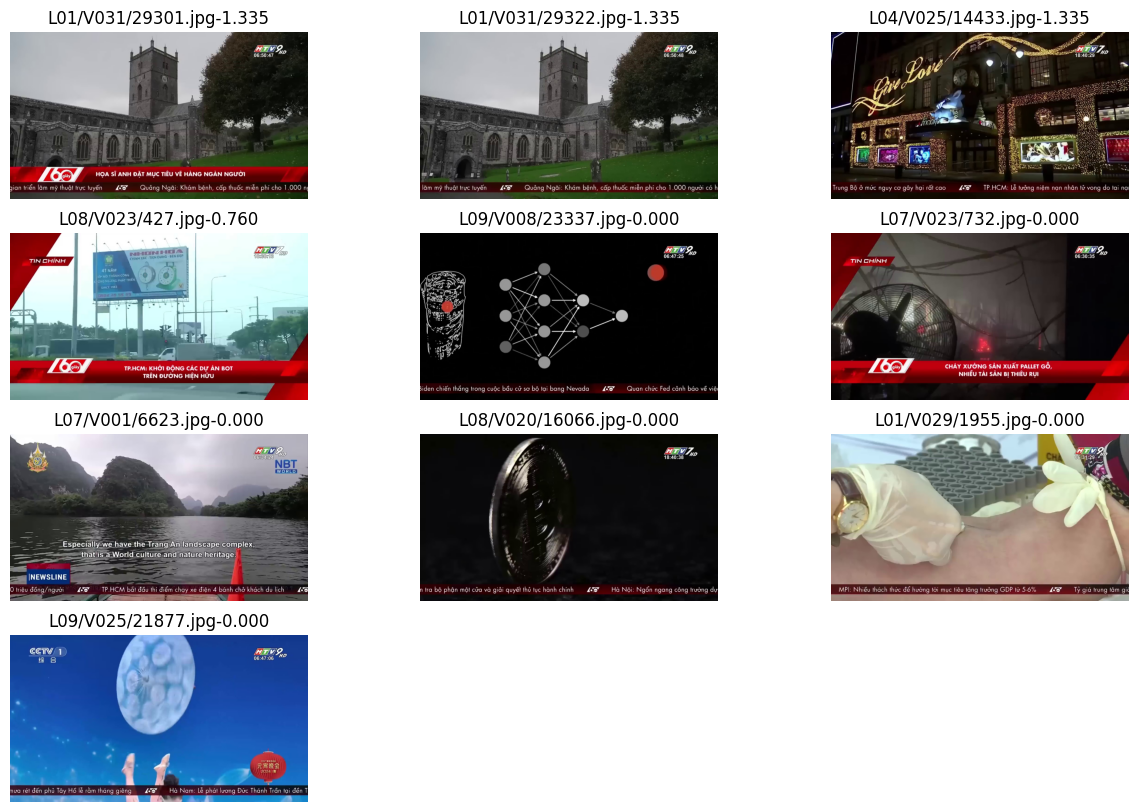

In [5]:
bbox_queries = {
    'object_bbox': 'd1clock d2clock',
    'color_bbox': None
}
oclass_queries = {
    'object_class': 'clock1',
    'object_number': 'clock1',
    'color_class': None
}
image_path_subset = [
    "./distilled_keyframe/L01/V001/0.jpg", 
    "./distilled_keyframe/L01/V001/6.jpg",
    "./distilled_keyframe/L01/V022/31971.jpg",
    "./distilled_keyframe/L10/V006/26139.jpg"
]
results = search_engine.metadata_search(oclass_queries, bbox_queries, None, 10)
display_images(results)

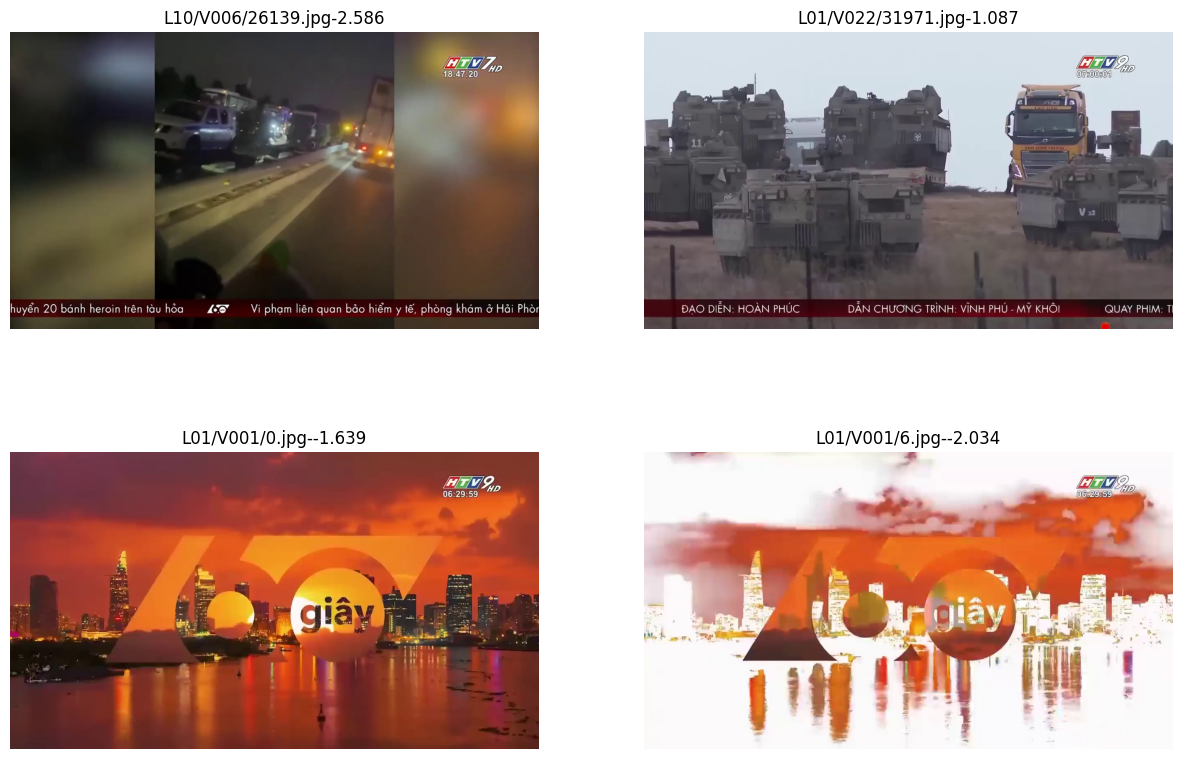

In [5]:
image_path_subset = [
    "./distilled_keyframe/L01/V001/0.jpg", 
    "./distilled_keyframe/L01/V001/6.jpg",
    "./distilled_keyframe/L01/V022/31971.jpg",
    "./distilled_keyframe/L10/V006/26139.jpg"
]

input_queries = {
    'object_bbox': 'c1person c2person e1truck e2truck f1truck f2truck',
    'color_bbox': 'a0black a0grey a1black a1grey a2black a3black a3brown a3grey a4brown a4grey a5black a5brown a5grey a6black a6brown a6grey b0black b0grey b1black b1grey b2black b2brown b2grey b3black b3brown b3grey b4brown b4grey b5black b5brown b5grey b6black b6brown b6grey c0black c0grey c1black c1grey c2black c2grey c3black c3brown c3grey c4black c4brown c4grey c5black c5brown c5grey c6black c6brown d0black d0grey d1black d1grey d2black d2grey d2white d3black d3brown d3grey d4black d4brown d4grey d5black d5brown d5grey d6black d6brown e0black e0grey e1black e1brown e1grey e2black e2brown e2grey e3black e3brown e3grey e4black e4brown e4grey e5black e5brown e6black e6brown f0black f0brown f0grey f1brown f1grey f2brown f2grey f3brown f3grey f4black f4brown f4grey f5black f5brown f6black f6brown g0brown g0grey g0white g1brown g1grey g1orange g2brown g2grey g2orange g3brown g3grey g4black g4brown g4grey g5black g5brown g5grey g6black g6brown'
}
results = bbox_search_engine(input_queries, image_path_subset, 5)
display_images(results)